# **Рубежный контроль №2.**

### **Тема: Методы построения моделей машинного обучения.**

Очеретная Светлана. ИУ5-65Б. Вариант 11 \
Набор данных: 
Метод 1: Метод опорных векторов \
Метод 2: Градиентный бустинг

**Задание** 
Для заданного набора данных (по варианту 11) построить модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Датасет: fifa19, но т.к. этот набор был удален с kaggle будем использовать другой набор fifa20

### **Импорт библиотек и загрузка датасета**
Импортируем библиотеки с помощью команды import.

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

In [282]:
filename = '../datasets/fifa20.csv'
data = pd.read_csv(filename)

### **Первичная обработка датасета**


#### **Очистка датасета**

In [283]:
# выберем столбцы из датасета
data = data[["sofifa_id", "short_name", "age", "work_rate", "height_cm", "weight_kg", "nationality", "club", "potential", "skill_moves", "body_type", "skill_ball_control", "shooting", "passing", "dribbling", "defending"]]

In [284]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,potential,skill_moves,skill_ball_control,shooting,passing,dribbling,defending
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,219738.864482,25.283291,181.362184,75.276343,71.546887,2.368038,58.461976,52.298301,57.233777,62.531585,51.553503
std,27960.200461,4.656964,6.756961,7.047744,6.139669,0.765038,16.741878,14.029418,10.407844,10.284950,16.419528
min,768.000000,16.000000,156.000000,50.000000,49.000000,1.000000,5.000000,15.000000,24.000000,23.000000,15.000000
25%,204445.500000,22.000000,177.000000,70.000000,67.000000,2.000000,54.000000,42.000000,50.000000,57.000000,36.000000
50%,226165.000000,25.000000,181.000000,75.000000,71.000000,2.000000,63.000000,54.000000,58.000000,64.000000,56.000000
75%,240795.750000,29.000000,186.000000,80.000000,75.000000,3.000000,69.000000,63.000000,64.000000,69.000000,65.000000
max,252905.000000,42.000000,205.000000,110.000000,95.000000,5.000000,96.000000,93.000000,92.000000,96.000000,90.000000


In [285]:
data.head()

,sofifa_id,short_name,age,work_rate,height_cm,weight_kg,nationality,club,potential,skill_moves,body_type,skill_ball_control,shooting,passing,dribbling,defending
0,158023,L. Messi,32,Medium/Low,170,72,Argentina,FC Barcelona,94,4,Messi,96,92.0,92.0,96.0,39.0
1,20801,Cristiano Ronaldo,34,High/Low,187,83,Portugal,Juventus,93,5,C. Ronaldo,92,93.0,82.0,89.0,35.0
2,190871,Neymar Jr,27,High/Medium,175,68,Brazil,Paris Saint-Germain,92,5,Neymar,95,85.0,87.0,95.0,32.0
3,200389,J. Oblak,26,Medium/Medium,188,87,Slovenia,Atlético Madrid,93,1,Normal,30,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,High/Medium,175,74,Belgium,Real Madrid,91,4,Normal,94,83.0,86.0,94.0,35.0


In [286]:
# проверим пропущенные значения
data.isnull().sum()

sofifa_id                0
short_name               0
age                      0
work_rate                0
height_cm                0
weight_kg                0
nationality              0
club                     0
potential                0
skill_moves              0
body_type                0
skill_ball_control       0
shooting              2036
passing               2036
dribbling             2036
defending             2036
dtype: int64

In [287]:
# удалим строки с неизвестными навыками игроков (shooting, passing, dribbling, defending)
data = data.dropna(axis='index', how='any', subset=['shooting'])

In [288]:
# проверим пропущенные значения
data.isnull().sum()

sofifa_id             0
short_name            0
age                   0
work_rate             0
height_cm             0
weight_kg             0
nationality           0
club                  0
potential             0
skill_moves           0
body_type             0
skill_ball_control    0
shooting              0
passing               0
dribbling             0
defending             0
dtype: int64

#### **Преобразование категориальных признаков в числовые**

In [289]:
data.dtypes

sofifa_id               int64
short_name             object
age                     int64
work_rate              object
height_cm               int64
weight_kg               int64
nationality            object
club                   object
potential               int64
skill_moves             int64
body_type              object
skill_ball_control      int64
shooting              float64
passing               float64
dribbling             float64
defending             float64
dtype: object

In [290]:
print(data['short_name'].unique().shape, data['short_name'].shape)
print(data['work_rate'].unique().shape, data['work_rate'].shape)
print(data['nationality'].unique().shape, data['nationality'].shape)
print(data['club'].unique().shape, data['club'].shape)
print(data['body_type'].unique().shape, data['body_type'].shape)

(15481,) (16242,)
(9,) (16242,)
(161,) (16242,)
(696,) (16242,)
(9,) (16242,)


Признаки short_name оставим как, есть, т.к. оно почти уникально. \
nationality, club, bode_type, work_rate преобразуем

In [291]:
data_numbers = data

In [292]:
def column_to_number(data, column):
  le = LabelEncoder()
  column_numbers = le.fit_transform(data[column])
  column_numbers_df = pd.DataFrame(column_numbers, columns=[column])
  data[[column]] = column_numbers_df
  return data

In [293]:
data_numbers = column_to_number(data, 'nationality')
data_numbers = column_to_number(data_numbers, 'club')
data_numbers = column_to_number(data_numbers, 'body_type')
data_numbers = column_to_number(data_numbers, 'work_rate')

In [294]:
data_numbers.head()

,sofifa_id,short_name,age,work_rate,height_cm,weight_kg,nationality,club,potential,skill_moves,body_type,skill_ball_control,shooting,passing,dribbling,defending
0,158023,L. Messi,32,7.0,170,72,5.0,222.0,94,4,3.0,96,92.0,92.0,96.0,39.0
1,20801,Cristiano Ronaldo,34,1.0,187,83,120.0,348.0,93,5,1.0,92,93.0,82.0,89.0,35.0
2,190871,Neymar Jr,27,2.0,175,68,18.0,460.0,92,5,4.0,95,85.0,87.0,95.0,32.0
4,183277,E. Hazard,28,0.0,175,74,12.0,398.0,91,4,5.0,94,83.0,86.0,94.0,35.0
5,192985,K. De Bruyne,28,8.0,181,70,107.0,387.0,91,4,5.0,91,86.0,92.0,86.0,61.0


C:\Users\Pocht\AppData\Local\Temp\ipykernel_22004\319223588.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data_numbers.corr(), dtype=np.bool)


<AxesSubplot:>

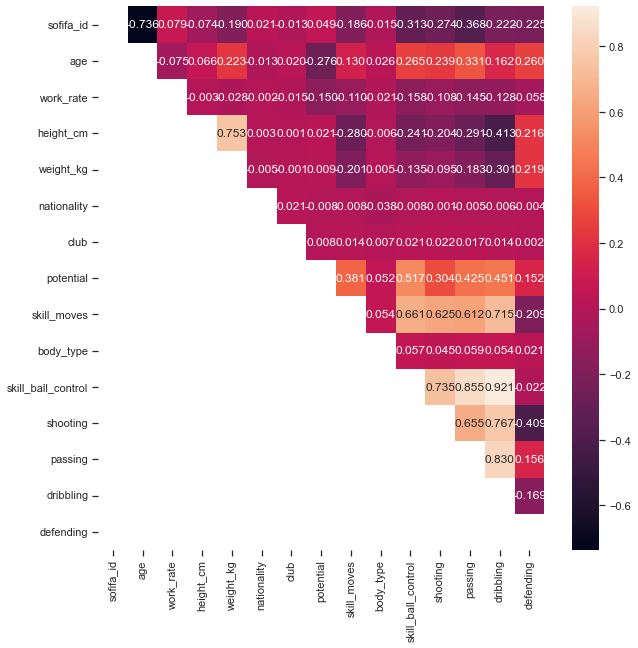

In [295]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,10))
mask = np.zeros_like(data_numbers.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data_numbers.corr(), mask=mask, annot=True, fmt='.3f')

По матрице корреляции можем заметить следующее:
- возраст и вес игрока связаны, что логично, т.к. это присуще каждому человеку.
- скил игрока тесно связано с контролем мяча. То есть чем опытнее игрок, тем он лучше владеет мячом.
- id связан с возрастом, это уже особенность датасета, возможно id составлялись в зависимости от возраста
Для средней степени корреляции:
- высота и вес игрока связаны с его навыками контроля мячом и skill_moves
- вес связан с типом тела, что тоже лего объяснить, исходя из природных особенностей человека
- потенциал игрока зависит от его скиллов и навыков контроля мячом

In [296]:
print(data['skill_ball_control'].unique().shape,
  data['dribbling'].unique().shape)

(73,) (71,)


#### **Разделение выборки на обучающую и тестовую**

In [297]:
data2 = data_numbers[["skill_ball_control", "dribbling"]]
target = data_numbers['potential']

In [298]:
x_train,x_test,y_train,y_test=train_test_split(data2,target,test_size=0.2,random_state=1)

In [299]:
data2_np = data2.to_numpy()
target_np = target.to_numpy()

In [300]:
column_x_name = 'skill_ball_control'
column_y_name = 'dribbling'

In [301]:
column_y = data_numbers[column_y_name].values
column_x = data_numbers[column_x_name].values

### **Метод опорных векторов**

Для анализа возьмем колонки dribbling (ведение мяча) и skill_ball_control, т.к. у них наибольшая корреляция. За целевой признак возьмем потенциал игрока

<AxesSubplot:>

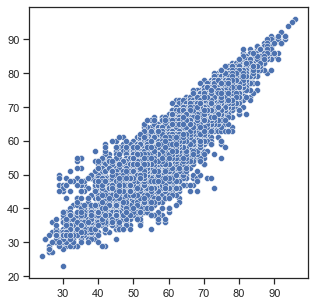

In [302]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=column_x, y=column_y)

In [303]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(column_x.reshape(-1, 1), column_y)
    y_pred = clf.predict(column_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(column_x, column_y, 'b.')
    ax.plot(column_x, y_pred, 'ro')
    plt.show()

In [304]:
svr = make_pipeline(StandardScaler(), LinearSVR(C=1.0, max_iter=10000, random_state=0))
svr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=10000, random_state=0))])

In [305]:
y_pred_svr = svr.predict(x_test)

c:\Users\Pocht\OneDrive\Study\6 семестр\ТМО (Гапанюк)\ML-Technologies\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


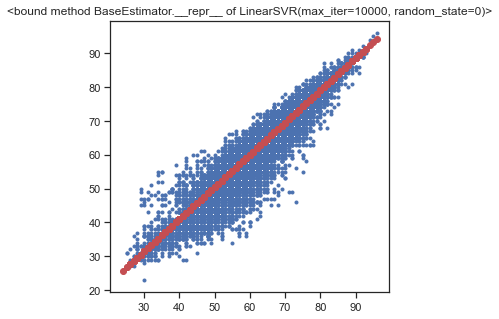

In [306]:
plot_regr(LinearSVR(C=1.0, max_iter=10000, random_state=0))

In [307]:
len(np.array(y_pred_svr)), len(np.array(y_test))

(3249, 3249)

### **Градиентный бустинг**

In [308]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [309]:
y_pred_gbr = gbr.predict(x_test)

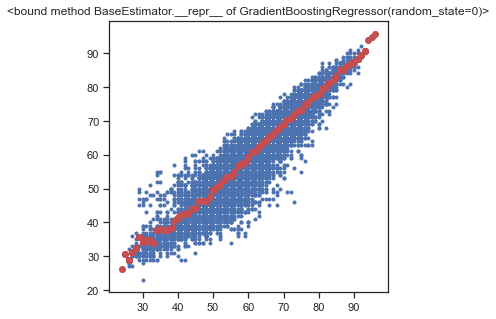

In [310]:
plot_regr(GradientBoostingRegressor(random_state=0))

### **Оценка качества моделей**

MAPE - средняя абсолютная ошибка в процентах.
- для оценки точности прогноза;
- показывает на сколько велики ошибки в сравнении со значениями ряда;
- хороша для сравнения 1-й модели для разных рядов;
- используется для сравнения разных моделей для одного ряда - это нам и нужно;

MSE (mean squared error) – среднеквадратическая ошибка прогноза.
- применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза.

MedAE (Median absolute error)- медианная абсолютная ошибка
- устойчива к выбросам

Метрика  R^2  или коэффициент детерминации
- рассматривают, как правило, в качестве основного показателя, отражающего меру качества регрессионной модели, описывающей связь между зависимой и независимыми переменными модели.

In [311]:
def quality_control(y_test, y_pred):
  print("mape:", mean_absolute_percentage_error(y_test, y_pred), 
        "\nmse:", mean_squared_error(y_test, y_pred), 
        "\nmsle:", mean_squared_log_error(y_test, y_pred), 
        "\nmedae:", median_absolute_error(y_test, y_pred), 
        "\nr2:", r2_score(y_test, y_pred))

In [312]:
quality_control(y_test, y_pred_svr)

mape: 0.0581029340162217 
mse: 26.756570748642435 
msle: 0.005073744423900302 
medae: 3.512986227840159 
r2: 0.2806081036778504


In [313]:
quality_control(y_test, y_pred_gbr)

mape: 0.05482782466619403 
mse: 23.763528122700542 
msle: 0.004527454521522773 
medae: 3.3922722309782216 
r2: 0.361080696024484


Cредняя абсолютная и среднеквадратичная ошибки показывают в обоих методам, что точность предсказания велика.
Однако метод градиентного бустинга показал результаты лучше, по сравнению с методом опорных векторов:
- mape, msle, medae чуть ближе к нулю
- показатель r2 ближе к единице